## 1) Importing important libraries and dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("F:/Data Science/Data Sets/Laptop Price Prediction/laptop_data.csv")
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [3]:
df.shape

(1303, 12)

## Conclusions:
- "Unnamed: 0" is a index column (which we can remove).
- "Company" column has some entries with very few frequency (we can remove those company rows).
- 'TypeName' comlumn has no issues.
- 'Inches' column has some entries with very few frequency (we can remove those company rows).
- 'ScreenResolution' column has many irregularities
- 'Cpu' column has many irregularities.
- 'Ram' column has vary few entries of 24GB and 64GB (we can remove those rows)
- 'Memory' column has many irregularities.
- 'Gpu' column has many irregularities.
- 'OpSys' column has some entries with very few frequency (we can remove those company rows).
- 'Weight' column has 'kg' string which can be removed and column should be converted to float.

## Preprocessing:

### 1) Removing 'Unnamed: 0' column:

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


### 2) Checking duplicates:

In [5]:
df.duplicated().sum()

29

In [6]:
df = df.drop_duplicates()

### 3)  Checking Null Values:

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### 4) 'Price' column: Removing Outliers:

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

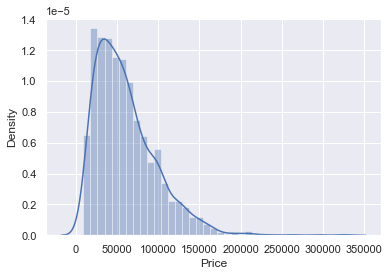

In [8]:
sns.distplot(df['Price'])

In [9]:
q = df['Price'].quantile(0.99)
df = df[df['Price']<q]

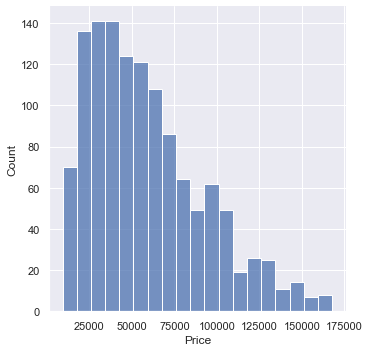

In [10]:
sns.displot(df['Price'])

#### Checkpoint 1:

In [11]:
df_2 = df.copy()

### 5) 'Company' column:

<AxesSubplot:xlabel='Company', ylabel='Price'>

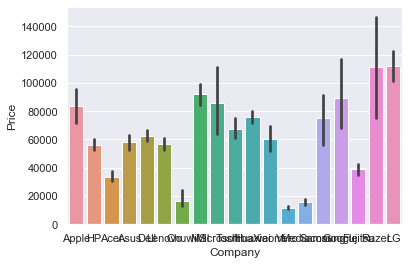

In [12]:
sns.barplot(x=df_2['Company'],y=df_2['Price'])

<AxesSubplot:>

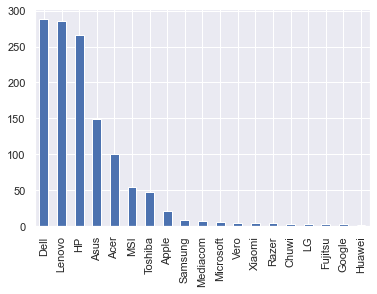

In [13]:
df_2['Company'].value_counts().plot(kind='bar')

In [14]:
Company_drop = ["Xiaomi", "Vero", "Google", "Chuwi", "Fujitsu", "LG", "Huawei"]

In [15]:
for i in range(len(Company_drop)):
    df_2 = df_2.drop(df_2[df_2.Company == Company_drop[i]].index)

In [16]:
df_2['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'MSI',
       'Microsoft', 'Toshiba', 'Mediacom', 'Samsung', 'Razer'],
      dtype=object)

<AxesSubplot:>

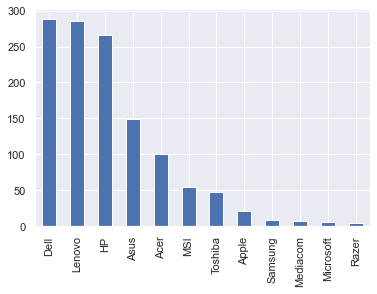

In [17]:
df_2['Company'].value_counts().plot(kind='bar')

#### Checkpoint 2:

In [18]:
df_3 = df_2.copy()

### 6) 'Ram' column:

<AxesSubplot:>

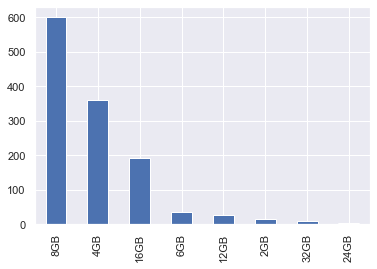

In [19]:
df_3['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

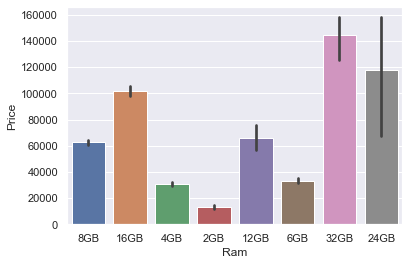

In [20]:
sns.barplot(x=df_3['Ram'],y=df_3['Price'])

In [21]:
Ram_drop = ['24GB','64GB']

In [22]:
for i in range(len(Ram_drop)):
    df_3 = df_3.drop(df_3[df_3.Ram == Ram_drop[i]].index)

In [23]:
df_3['Ram'].value_counts()

8GB     601
4GB     360
16GB    191
6GB      34
12GB     25
2GB      15
32GB     10
Name: Ram, dtype: int64

In [24]:
df_3['Ram'] = df_3['Ram'].str.replace('GB','')
df_3['Ram'] = df_3['Ram'].astype(int)

#### Checkpoint 3:

In [25]:
df_4 = df_3.copy()

### 7) 'OpSys' column

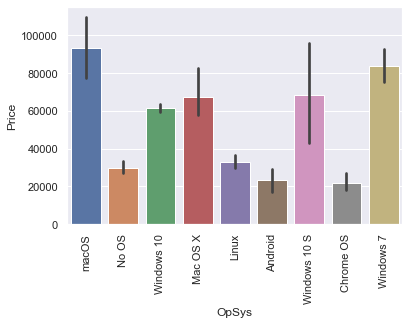

In [26]:
sns.barplot(x=df_4['OpSys'],y=df_4['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
df_4['OpSys'].value_counts()

Windows 10      1017
No OS             63
Linux             58
Windows 7         43
Chrome OS         24
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [28]:
def operating_sys(text):
    if text == 'Windows 7' or text == "Windows 10" or text == "Windows 10 S":
        return "Windows"
    else:
        if text == "macOS" or text == "Mac OS X":
            return "macOS"
        else:
            return "No OS/Linux/Chrome/Android"

In [29]:
df_4['OpSys'] = df_4['OpSys'].apply(operating_sys)

In [30]:
df_4['OpSys'].value_counts()

Windows                       1068
No OS/Linux/Chrome/Android     147
macOS                           21
Name: OpSys, dtype: int64

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

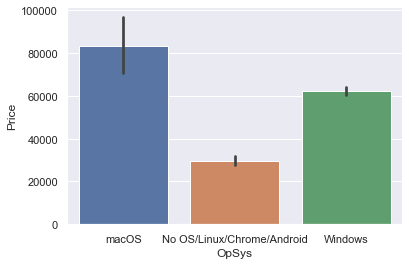

In [31]:
sns.barplot(x=df_4['OpSys'],y=df_4['Price'])

#### Checkpoint 4:

In [32]:
df_5 = df_4.copy()

### 8) 'TypeName' Column:

<AxesSubplot:>

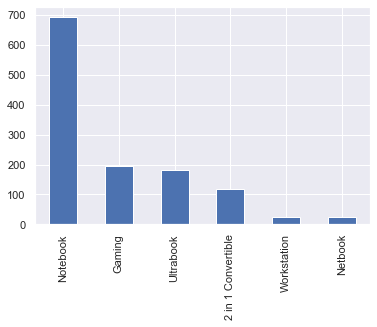

In [33]:
df_5['TypeName'].value_counts().plot(kind='bar')

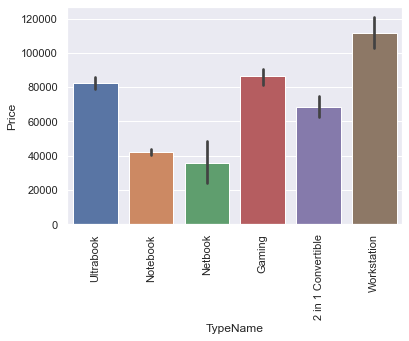

In [34]:
sns.barplot(x=df_5['TypeName'],y=df_5['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 9) 'Weight' column:

In [35]:
df_5['Weight'] = df_5['Weight'].str.replace('kg','')

In [36]:
df_5['Weight'] = df_5['Weight'].astype(float)

In [37]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1236 non-null   object 
 1   TypeName          1236 non-null   object 
 2   Inches            1236 non-null   float64
 3   ScreenResolution  1236 non-null   object 
 4   Cpu               1236 non-null   object 
 5   Ram               1236 non-null   int32  
 6   Memory            1236 non-null   object 
 7   Gpu               1236 non-null   object 
 8   OpSys             1236 non-null   object 
 9   Weight            1236 non-null   float64
 10  Price             1236 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 151.0+ KB


### 10) 'ScreenResolution' column:

In [38]:
df_5['ScreenResolution'].value_counts()

Full HD 1920x1080                                499
1366x768                                         258
IPS Panel Full HD 1920x1080                      215
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                8
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
4K Ultra HD 3840x2160                              6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                                      

In [39]:
df_5['Touchscreen'] = df_5['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [40]:
df_5['Touchscreen'].value_counts()

0    1056
1     180
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

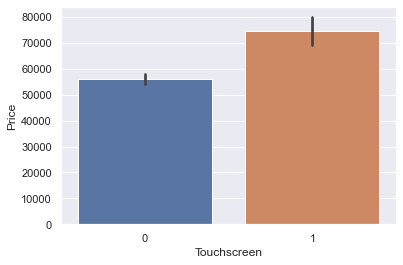

In [41]:
sns.barplot(x=df_5['Touchscreen'],y=df_5['Price'])

In [42]:
df_5['IPS_Panel'] = df_5['ScreenResolution'].apply(lambda x:1 if "IPS Panel" in x else 0)

In [43]:
df_5['IPS_Panel'].value_counts()

0    899
1    337
Name: IPS_Panel, dtype: int64

<AxesSubplot:xlabel='IPS_Panel', ylabel='Price'>

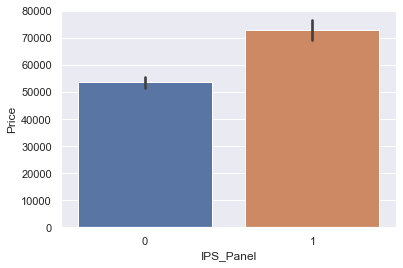

In [44]:
sns.barplot(x=df_5['IPS_Panel'],y=df_5['Price'])

In [45]:
new = df_5['ScreenResolution'].str.split('x',n=1,expand=True)

In [46]:
df_5['X_Resolution'] = new[0]
df_5['Y_Resolution'] = new[1]

In [47]:
df_5['X_Resolution'] = df_5['X_Resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [48]:
df_5.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [49]:
df_5['X_Resolution'] = df_5['X_Resolution'].astype('int32')
df_5['Y_Resolution'] = df_5['Y_Resolution'].astype('int32')

In [50]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1236 non-null   object 
 1   TypeName          1236 non-null   object 
 2   Inches            1236 non-null   float64
 3   ScreenResolution  1236 non-null   object 
 4   Cpu               1236 non-null   object 
 5   Ram               1236 non-null   int32  
 6   Memory            1236 non-null   object 
 7   Gpu               1236 non-null   object 
 8   OpSys             1236 non-null   object 
 9   Weight            1236 non-null   float64
 10  Price             1236 non-null   float64
 11  Touchscreen       1236 non-null   int64  
 12  IPS_Panel         1236 non-null   int64  
 13  X_Resolution      1236 non-null   int32  
 14  Y_Resolution      1236 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 180.0+ KB


### 11) Creatiing new Column 'Res_per_Inches':

In [51]:
df_5.corr()['Price']

Inches          0.014076
Ram             0.718340
Weight          0.146108
Price           1.000000
Touchscreen     0.192593
IPS_Panel       0.254039
X_Resolution    0.542556
Y_Resolution    0.541652
Name: Price, dtype: float64

In [52]:
df_5["Res_Per_Inches"] = (((df_5['X_Resolution']**2 + df_5['Y_Resolution']**2)**0.5)/df_5['Inches']).astype('float')

In [53]:
df_5.corr()['Price']

Inches            0.014076
Ram               0.718340
Weight            0.146108
Price             1.000000
Touchscreen       0.192593
IPS_Panel         0.254039
X_Resolution      0.542556
Y_Resolution      0.541652
Res_Per_Inches    0.481486
Name: Price, dtype: float64

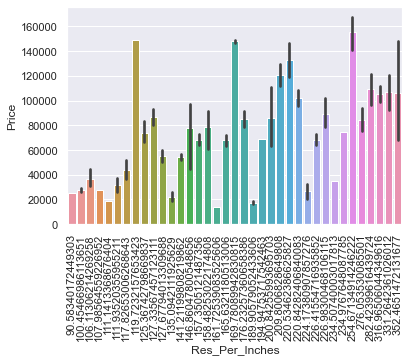

In [54]:
sns.barplot(x=df_5['Res_Per_Inches'],y=df_5['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df_5.drop(columns=['ScreenResolution','X_Resolution','Y_Resolution','Inches'],axis=1,inplace=True)

In [56]:
df_5.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


#### Checkpoint 5:

In [57]:
df_6 = df_5.copy()

### 12) 'Cpu' Column:

In [58]:
df_6['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              186
Intel Core i7 7700HQ 2.8GHz             141
Intel Core i7 7500U 2.7GHz              128
Intel Core i7 8550U 1.8GHz               71
Intel Core i5 8250U 1.6GHz               71
                                       ... 
Intel Core M M7-6Y75 1.2GHz               1
Intel Core i7 7500U 2.5GHz                1
Intel Core i7 2.9GHz                      1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core i5 7200U 2.70GHz               1
Name: Cpu, Length: 113, dtype: int64

In [59]:
df_6['CpuName'] = df_6['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [60]:
def fetch_processor(text):
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [61]:
df_6['Cpu_Brand'] = df_6['CpuName'].apply(fetch_processor)

In [62]:
df_6.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,CpuName,Cpu_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


In [63]:
df_6['Cpu_Brand'].value_counts()

Intel Core i7            495
Intel Core i5            414
Intel Core i3            134
Other Intel Processor    132
AMD Processor             61
Name: Cpu_Brand, dtype: int64

<AxesSubplot:xlabel='Cpu_Brand', ylabel='Price'>

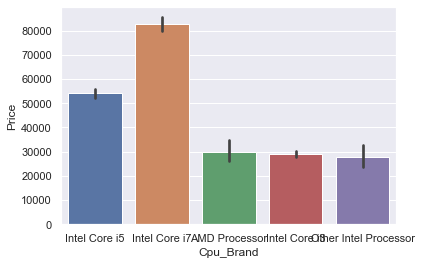

In [64]:
sns.barplot(x=df_6['Cpu_Brand'],y=df_6['Price'])

In [65]:
df_6.drop(columns=['Cpu','CpuName'],axis=1,inplace=True)

#### Checkpoint 6:

In [66]:
df_7 = df_6.copy()

### 13) 'Memory' column:

In [67]:
df_7['Memory'].value_counts()

256GB SSD                        402
1TB HDD                          214
500GB HDD                        123
512GB SSD                        106
128GB SSD +  1TB HDD              94
128GB SSD                         73
256GB SSD +  1TB HDD              72
32GB Flash Storage                32
2TB HDD                           16
512GB SSD +  1TB HDD              12
256GB SSD +  2TB HDD              10
64GB Flash Storage                10
1TB SSD                            9
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
64GB SSD                           1
1.0TB HDD                          1
8

In [68]:
df_7['Memory'] = df_7['Memory'].astype(str).replace('\.0','',regex=True)
df_7['Memory'] = df_7['Memory'].str.replace('GB','')
df_7['Memory'] = df_7['Memory'].str.replace('TB','000')
new = df_7['Memory'].str.split('+', n=1, expand=True)

In [69]:
df_7['first'] = new[0]
df_7['first'] = df_7['first'].str.strip()
df_7['second'] = new[1]

In [70]:
df_7['Layer1HDD'] = df_7['first'].apply(lambda x:1 if "HDD" in x else 0)
df_7['Layer1SSD'] = df_7['first'].apply(lambda x:1 if "SSD" in x else 0)
df_7['Layer1Hybrid'] = df_7['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df_7['Layer1Flash_storage'] = df_7['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

In [71]:
df_7['first'] = df_7['first'].str.replace(r'\D','')
df_7['second'].fillna("0",inplace=True)

In [72]:
df_7['Layer2HDD'] = df_7['second'].apply(lambda x:1 if "HDD" in x else 0)
df_7['Layer2SSD'] = df_7['second'].apply(lambda x:1 if "SSD" in x else 0)
df_7['Layer2Hybrid'] = df_7['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df_7['Layer2Flash_storage'] = df_7['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

In [73]:
df_7['second'] = df_7['second'].str.replace(r'\D','')

In [74]:
df_7['first'] = df_7['first'].astype(int)
df_7['second'] = df_7['second'].astype(int)

In [75]:
df_7['HDD'] = (df_7['first']*df_7['Layer1HDD']+df_7['second']*df_7['Layer2HDD'])
df_7['SSD'] = (df_7['first']*df_7['Layer1SSD']+df_7['second']*df_7['Layer2SSD'])
df_7['Hybrid'] = (df_7['first']*df_7['Layer1Hybrid']+df_7['second']*df_7['Layer2Hybrid'])
df_7['Flash_storage'] = (df_7['first']*df_7['Layer1Flash_storage']+df_7['second']*df_7['Layer2Flash_storage'])

In [76]:
df_7.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_storage'],inplace=True)

In [77]:
df_7.drop(['Memory'],axis=1,inplace=True)

In [78]:
df_7.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


<AxesSubplot:xlabel='HDD', ylabel='Price'>

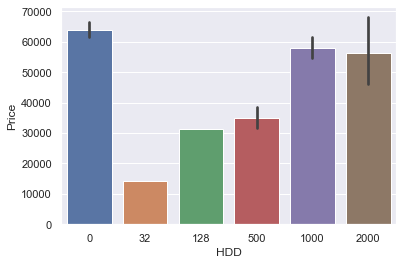

In [79]:
sns.barplot(x=df_7['HDD'],y=df_7['Price'])

<AxesSubplot:xlabel='SSD', ylabel='Price'>

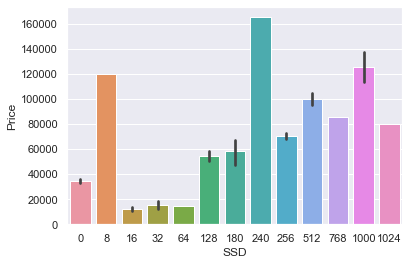

In [80]:
sns.barplot(x=df_7['SSD'],y=df_7['Price'])

<AxesSubplot:xlabel='Hybrid', ylabel='Price'>

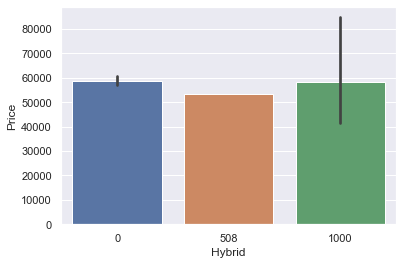

In [81]:
sns.barplot(x=df_7['Hybrid'],y=df_7['Price'])

<AxesSubplot:xlabel='Flash_storage', ylabel='Price'>

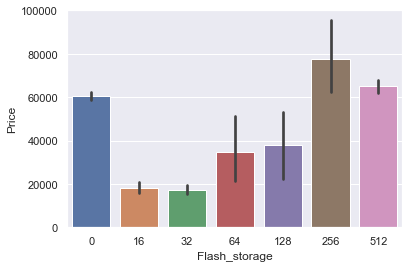

In [82]:
sns.barplot(x=df_7['Flash_storage'],y=df_7['Price'])

#### Checkpoint 7:

In [83]:
df_8 = df_7.copy()

### 14) 'Gpu' Column:

In [84]:
df_8['Gpu'].value_counts()

Intel HD Graphics 620      271
Intel HD Graphics 520      180
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     47
                          ... 
AMD Radeon R9 M385           1
Nvidia Quadro M520M          1
AMD R17M-M1-70               1
AMD Radeon R5 430            1
Nvidia Quadro M2000M         1
Name: Gpu, Length: 106, dtype: int64

In [85]:
df_8['Gpu'] = df_8['Gpu'].apply(lambda x: x.split()[0])

In [86]:
df_8['Gpu'].value_counts()

Intel     684
Nvidia    377
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [87]:
df_8 = df_8.drop(df_8[df_8.Gpu == "ARM"].index)

<AxesSubplot:xlabel='Gpu', ylabel='Price'>

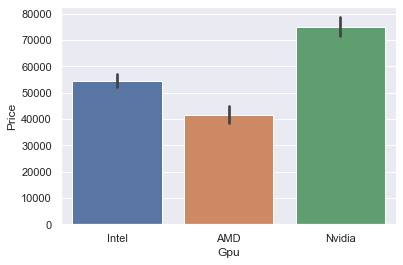

In [88]:
sns.barplot(x=df_8['Gpu'],y=df_8['Price'])

In [89]:
df_8.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [90]:
df_8.corr()['Price']

Ram               0.718203
Weight            0.145461
Price             1.000000
Touchscreen       0.194487
IPS_Panel         0.255306
Res_Per_Inches    0.483640
HDD              -0.095426
SSD               0.634914
Hybrid           -0.002051
Flash_storage    -0.023152
Name: Price, dtype: float64

- Hybrid and Flash_Storage has ver low correlation with Price so we can drop those columns

In [91]:
df_8.drop(columns = ['Hybrid','Flash_storage'],axis=1,inplace=True)

#### Checkpoint 8:

In [101]:
df_9 = df_8.copy()

In [102]:
df_9.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


In [103]:
df_9.to_csv('F:/Data Science/Data Sets/Laptop Price Prediction/cleaned_laptop_data.csv')

<AxesSubplot:>

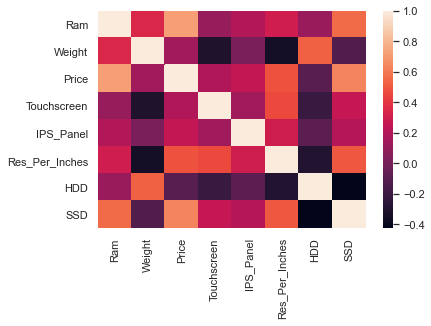

In [95]:
sns.heatmap(df_9.corr())